In [94]:
%matplotlib inline

In [95]:
from datetime import datetime

from matplotlib import pyplot, rcParams
import pandas
import seaborn

In [96]:
seaborn.set(style='darkgrid', palette='Set2')
rcParams['savefig.dpi'] = 300
chosenPalette='Set2'

In [97]:
def dateParser(*args):
    return datetime.strptime('-'.join([str(arg) for arg in args]),'%y-%m-%d-%H-%M')

In [98]:
data = pandas.read_csv('coffee-tracker.csv', header=None,
                       parse_dates=[[0, 1, 2, 3, 4]],
                       date_parser=dateParser)

In [99]:
data.columns = ['Datetime', 'Drink', 'Location', 'City', 'State']

In [100]:
data['date'] = pandas.Series([xx.date() for xx in data.Datetime])
data['Local Time'] = pandas.Series([xx.hour + xx.minute / 60. for xx in data.Datetime])
data['Weekday'] = pandas.Series([xx.weekday_name for xx in data.Datetime])

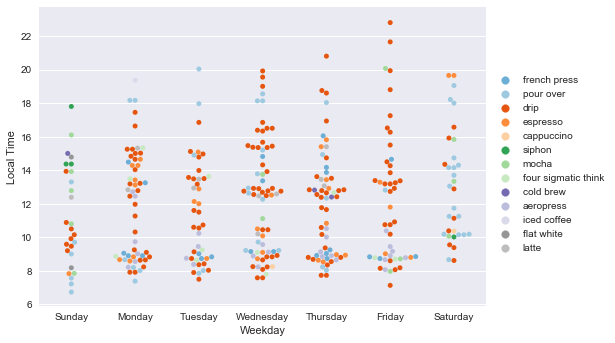

In [101]:
seaborn.swarmplot(data=data, x='Weekday', y='Local Time', hue='Drink', palette='Vega20c',
                       order=['Sunday','Monday','Tuesday','Wednesday', 'Thursday','Friday','Saturday'])
lgd = pyplot.legend(bbox_to_anchor=(1.0, 0.8))
pyplot.savefig('drinkTypes.png', bbox_extra_artists=(lgd, ), bbox_inches='tight')

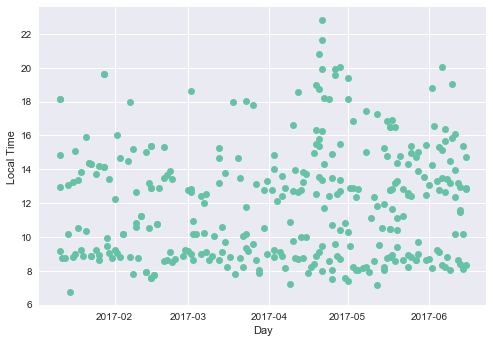

In [102]:
pyplot.plot(data['date'],data['Local Time'], 'o')
pyplot.xlabel('Day')
pyplot.ylabel('Local Time')
pyplot.savefig('drinkTimes.png')

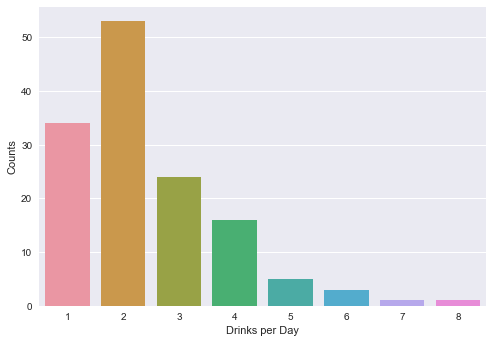

In [103]:
drinksPerDay = pandas.DataFrame({'Drinks Per Day': data.date.value_counts()})
seaborn.countplot(data=drinksPerDay, x='Drinks Per Day')
pyplot.xlabel('Drinks per Day')
pyplot.ylabel('Counts')
pyplot.savefig('drinkCounts.png')

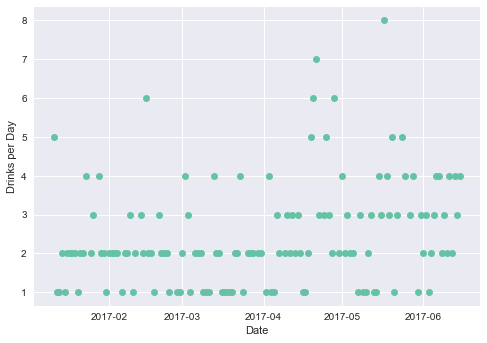

In [104]:
pyplot.plot(drinksPerDay.index, drinksPerDay.iloc[:, 0], 'o')
pyplot.xlabel('Date')
pyplot.ylabel('Drinks per Day')
pyplot.savefig('dailyDrinks.png')

In [105]:
drinksPerDay.head(10)

,Drinks Per Day
2017-05-17,8
2017-04-21,7
2017-02-15,6
2017-04-20,6
2017-04-28,6
2017-04-25,5
2017-01-11,5
2017-05-24,5
2017-04-19,5
2017-05-20,5


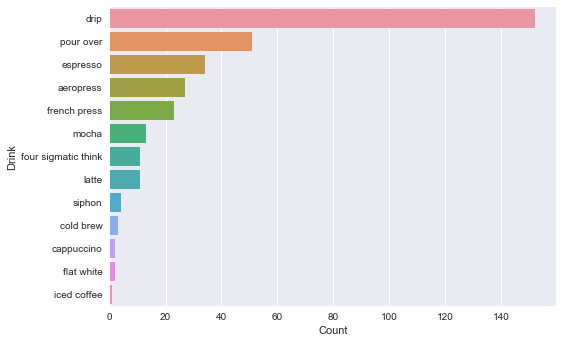

In [106]:
seaborn.countplot(data=data, y='Drink', order=data.Drink.value_counts().index)
pyplot.xlabel('Count')
pyplot.savefig('numDrinkTypes.png', bbox_inches='tight')